In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Reading in data and clean data
YEAR = 2022
data = pd.read_csv('https://github.com/nflverse/nflverse-data/releases/download/pbp/' \
                   'play_by_play_' + str(YEAR) + '.csv.gz',
                   compression= 'gzip', low_memory= False)

data = data.loc[(data.play_type.isin(['no_play','pass','run'])) & (data.epa.isna()==False)]

data.loc[data['pass']==1, 'play_type'] = 'pass'
data.loc[data.rush==1, 'play_type'] = 'run'

data.reset_index(drop=True, inplace=True)



In [122]:
filtered_data = data[data['week'] > 7]

In [128]:
def generateData(data): 
    qbs = data.groupby(['passer_player_id', 'passer_player_name']).agg({'epa':'mean', 'cpoe':'mean', 'play_id':'count'})

    qbs = qbs[qbs['play_id'] > 100]

    qbs.reset_index(inplace = True)

    niner_qbs = ['Garoppolo', 'Lance', 'Purdy']
    niners = qbs[[any(niner in qb_name for niner in niner_qbs) for qb_name in qbs['passer_player_name']]]

    niners.reset_index(drop=True, inplace=True)
    defdvoa = pd.read_csv("defdvoa.csv")

    qbs_dvoa = data.groupby(['passer_player_id', 'passer_player_name', 'defteam']).agg({'play_id':'count'})
    qbs_dvoa.reset_index(inplace=True)

    defdvoa = defdvoa[['Team', 'Total DVOA']]

    qbs_dvoa = qbs_dvoa.merge(defdvoa, left_on = 'defteam', right_on='Team')

    qbs_dvoa =qbs_dvoa[['passer_player_id', 'passer_player_name', 'defteam', 'Total DVOA']]

    qbs_dvoa['Total DVOA'] = [float(percentage[:-1]) for percentage in qbs_dvoa['Total DVOA'] if percentage[-1] == "%"]

    qbs_dvoa = qbs_dvoa.groupby(['passer_player_id', 'passer_player_name']).agg({'Total DVOA':'mean'})

    qbs_dvoa.reset_index(inplace=True)

    qbs_dvoa = qbs_dvoa.merge(qbs)

    qbs_dvoa = qbs_dvoa.sort_values(by = 'Total DVOA', ascending = False)
    qbs_dvoa.reset_index(drop=True, inplace=True)

    niner_qbs = ['Garoppolo', 'Lance', 'Purdy']
    niners_dvoa = qbs_dvoa[[any(niner in qb_name for niner in niner_qbs) for qb_name in qbs_dvoa['passer_player_name']]]
    niners_dvoa.reset_index(drop=True, inplace=True)
    return [qbs, niners, qbs_dvoa, niners_dvoa]

In [129]:
qbs, niners, qbs_dvoa, niners_dvoa = generateData(data)

In [130]:
qbs_filtered, niners_filtered, qbs_dvoa_filtered, niners_dvoa_filtered = generateData(filtered_data)

### Plot for EPA vs. CPOE highlighting 49ers QBs

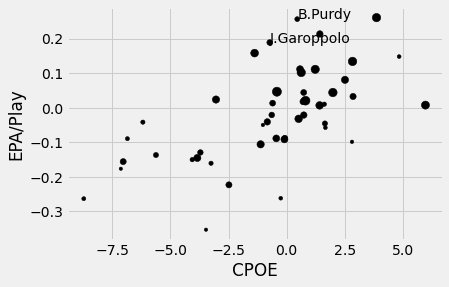

In [131]:
plt.style.use('fivethirtyeight')
x = qbs['cpoe']
y = qbs['epa']
colors =  'black'
area =qbs['play_id']/10

plt.xlabel('CPOE')
plt.ylabel('EPA/Play')
plt.scatter(x, y, s=area, c=colors)
for idx, name in enumerate(niners['passer_player_name']):
    plt.annotate(name, (niners['cpoe'][idx], niners['epa'][idx]))
plt.show()

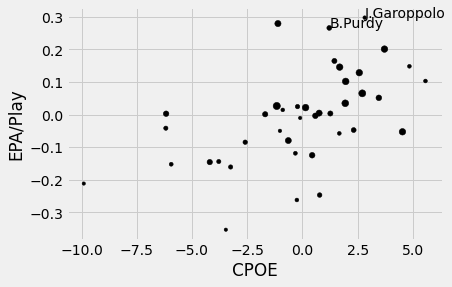

In [132]:
plt.style.use('fivethirtyeight')
x = qbs_filtered['cpoe']
y = qbs_filtered['epa']
colors =  'black'
area =qbs_filtered['play_id']/10

plt.xlabel('CPOE')
plt.ylabel('EPA/Play')
plt.scatter(x, y, s=area, c=colors)
for idx, name in enumerate(niners_filtered['passer_player_name']):
    plt.annotate(name, (niners_filtered['cpoe'][idx], niners_filtered['epa'][idx]))
plt.show()

### Plot for EPA vs. CPOE with all QB labels

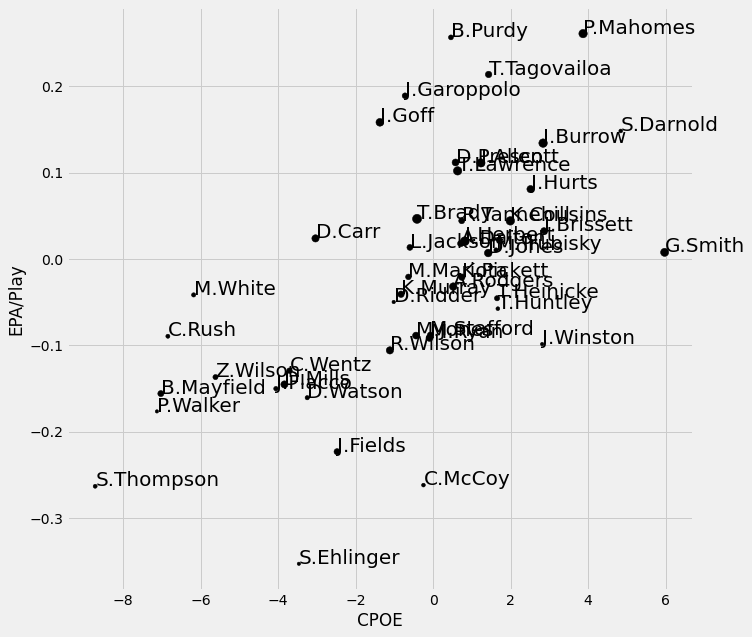

In [114]:
plt.style.use('fivethirtyeight')
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
x = qbs['cpoe']
y = qbs['epa']
colors =  'black'
area =qbs['play_id']/10

plt.xlabel('CPOE')
plt.ylabel('EPA/Play')
plt.scatter(x, y, s=area, c=colors)
for idx, name in enumerate(qbs['passer_player_name']):
    plt.annotate(name, (qbs['cpoe'][idx], qbs['epa'][idx]), size=20)
plt.show()

### EPA vs. DVOA, all QB labels

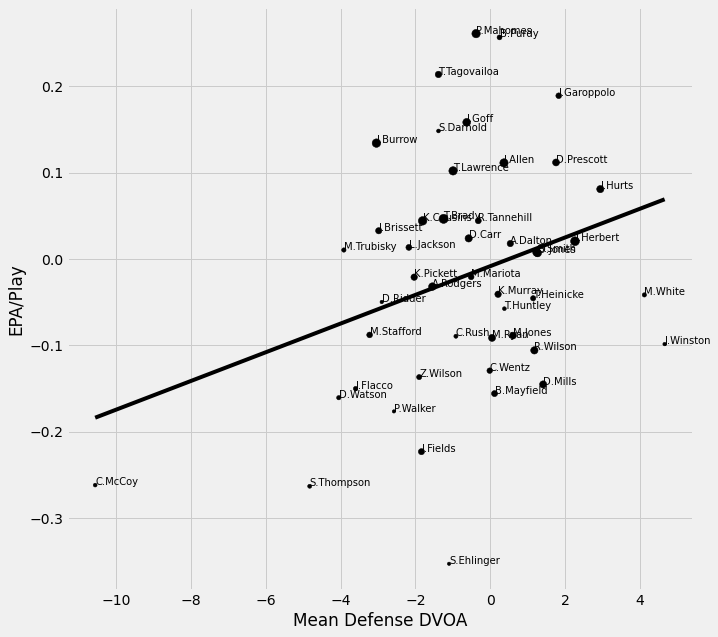

In [119]:
plt.style.use('fivethirtyeight')
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
x = qbs_dvoa['Total DVOA']
y = qbs_dvoa['epa']
colors =  'black'
area =qbs_dvoa['play_id']/10
#find line of best fit
a, b = np.polyfit(x, y, 1)



#add line of best fit to plot
plt.plot(x, a*x+b, c=colors)
plt.xlabel('Mean Defense DVOA')
plt.ylabel('EPA/Play')
plt.scatter(x, y, s=area, c=colors)
for idx, name in enumerate(qbs_dvoa['passer_player_name']):
    plt.annotate(name, (qbs_dvoa['Total DVOA'][idx], qbs_dvoa['epa'][idx]), size=10)
    

plt.show()

### EPA vs. DVOA, highlighting 49er QBs

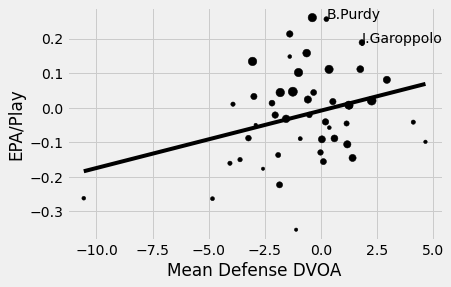

In [108]:
plt.style.use('fivethirtyeight')
x = qbs_dvoa['Total DVOA']
y = qbs_dvoa['epa']
colors =  'black'
area =qbs_dvoa['play_id']/10
#find line of best fit
a, b = np.polyfit(x, y, 1)



#add line of best fit to plot
plt.plot(x, a*x+b, c=colors)
plt.xlabel('Mean Defense DVOA')
plt.ylabel('EPA/Play')
plt.scatter(x, y, s=area, c=colors)
for idx, name in enumerate(niners_dvoa['passer_player_name']):
    plt.annotate(name, (niners_dvoa['Total DVOA'][idx], niners_dvoa['epa'][idx]))
    

plt.show()

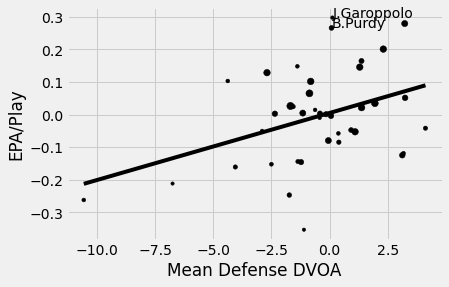

In [135]:
plt.style.use('fivethirtyeight')
x = qbs_dvoa_filtered['Total DVOA']
y = qbs_dvoa_filtered['epa']
colors =  'black'
area =qbs_dvoa_filtered['play_id']/10
#find line of best fit
a, b = np.polyfit(x, y, 1)



#add line of best fit to plot
plt.plot(x, a*x+b, c=colors)
plt.xlabel('Mean Defense DVOA')
plt.ylabel('EPA/Play')
plt.scatter(x, y, s=area, c=colors)
for idx, name in enumerate(niners_dvoa_filtered['passer_player_name']):
    plt.annotate(name, (niners_dvoa_filtered['Total DVOA'][idx], niners_dvoa_filtered['epa'][idx]))
    

plt.show()